# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
path = r'/Users/docopeland/04 Instacart Basket Analysis'
final = pd.read_pickle(os.path.join(path,'02 Data','prepared data','final.pkl'))

# Question 1

## Busiest days of the week and hours of the day

In [3]:
final['order_day_of_week'].value_counts().sort_index()

0    5908610
1    5411686
2    4024706
3    3669535
4    3624994
5    4033729
6    4291304
Name: order_day_of_week, dtype: int64

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

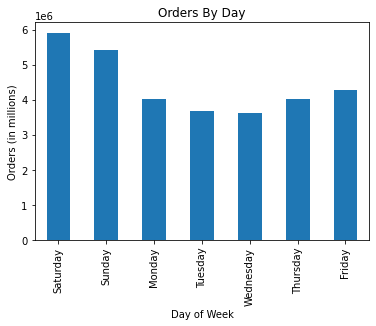

In [26]:
# create a bar chart that plots days of the week by the number of orders
q1DayBar = final['order_day_of_week'].value_counts().sort_index().plot(kind = 'bar', title = 'Orders By Day', ylabel = 'Orders (in millions)', xlabel = 'Day of Week')
q1DayBar.set_xticklabels(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])


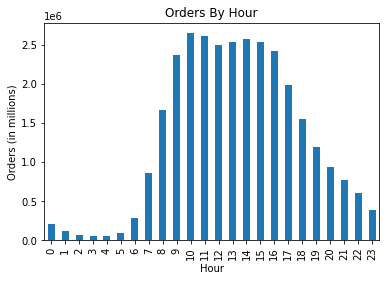

In [7]:
#bar chart that shows the hour of day and the number of orders
q1HourBar = final['order_hour_of_day'].value_counts().sort_index().plot(kind = 'bar', title = 'Orders By Hour', ylabel = 'Orders (in millions)', xlabel = 'Hour')

# Question 2

## Particular times of day when people spend the most money

In [8]:
#create a todRevenue df that groups the sum of prices by time of day and price range
todRevenue = pd.DataFrame(final.groupby(['time_of_day','price_range_loc']).agg({'prices':['sum']})).unstack()

In [9]:
#naming the columns of the todRevenue df
todRevenue.columns = ['High-range product','Low-range product','Mid-range product']

In [10]:
#sort the columns so that they go from lowest to most expensive in columns
todRevenue = todRevenue.reindex(columns = ['Low-range product','Mid-range product','High-range product'])

In [11]:
todRevenue

,Low-range product,Mid-range product,High-range product
time_of_day,,,
Afternoon,11349824.9,79342559.8,54196867.8
Morning,10443444.6,72220575.2,49514577.9
Night,7461830.6,52273229.1,32713371.7


In [37]:
todRevenue.value_counts()

Low-range product  Mid-range product  High-range product
7461830.6          52273229.1         32713371.7            1
10443444.6         72220575.2         49514577.9            1
11349824.9         79342559.8         54196867.8            1
dtype: int64

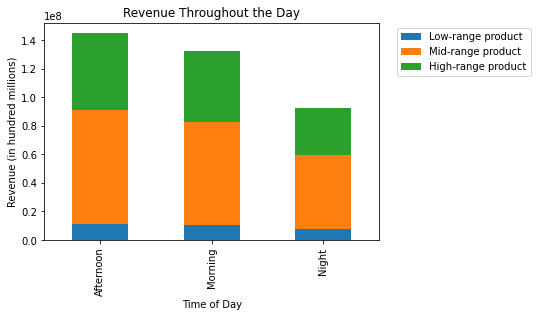

In [33]:
#creating a bar chart that shows the revenue throughout the day 
todRevenue.plot(kind = 'bar', stacked = True)
plt.title('Revenue Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Revenue (in hundred millions)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [38]:
#create a new todOrders df that groups the count of orders by time of day and price range
todOrders = pd.DataFrame(final.groupby(['time_of_day','price_range_loc']).agg({'order_id':['count']})).unstack()

In [39]:
#setting the names of the columns
todOrders.columns = ['High-range product','Low-range product','Mid-range product']

In [40]:
#sorting the columns from low to high
todOrders = todOrders.reindex(columns = ['Low-range product','Mid-range product','High-range product'])

In [41]:
todOrders

,Low-range product,Mid-range product,High-range product
time_of_day,,,
Afternoon,3749760,8131252,158159
Morning,3456354,7404869,137679
Night,2468726,5355650,102115


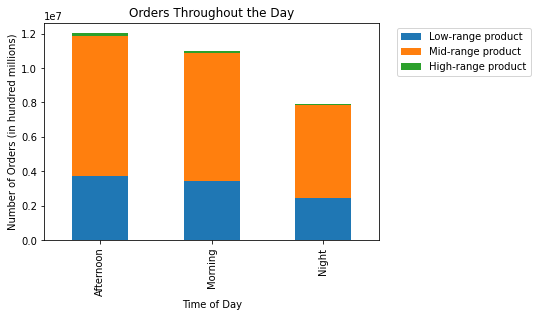

In [43]:
#creating a bar chart that shows the revenue throughout the day 
todOrders.plot(kind = 'bar', stacked = True)
plt.title('Orders Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders (in hundred millions)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# Question 3

## Instacart has a lot of products with different price tags.

In [79]:
price_group = pd.DataFrame(final.groupby(['price_range_loc']).agg({'product_id':['nunique']}))

In [81]:
price_group.columns = ['items']

In [82]:
price_group

,items
price_range_loc,
High-range product,547
Low-range product,16280
Mid-range product,32802


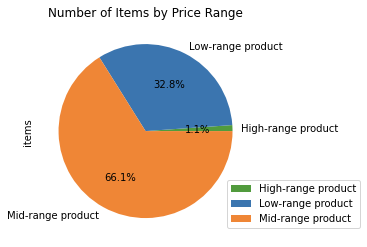

In [83]:
colors = ['#519B3D','#3B75AF','#EF8636']
q3 = price_group.plot(kind = 'pie', y = 'items', autopct='%1.1f%%', colors = colors)
plt.title('Number of Items by Price Range')
plt.legend(bbox_to_anchor=(.85,.3), loc="upper left")

In [47]:
q3b = final.groupby(['price_range_loc']).agg({'order_id':['count']})

In [48]:
q3b.columns = ['order_count']

In [49]:
q3b

,order_count
price_range_loc,
High-range product,397953
Low-range product,9674840
Mid-range product,20891771


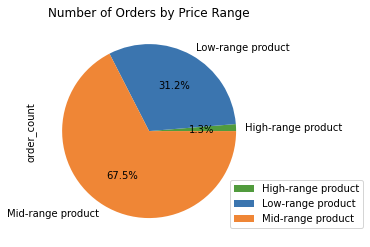

In [51]:
ordColors = ['#519B3D','#3B75AF','#EF8636']
q3b.plot(kind = 'pie', autopct = '%1.1f%%', y = 'order_count', title = 'Number of Orders by Price Range', colors = ordColors)
plt.legend(bbox_to_anchor=(.85,.3), loc="upper left")

# Question 4

## Are there certain types of products that are more popular than others?

In [162]:
final['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

<AxesSubplot:title={'center':'Number of Products by Department'}, xlabel='Departments', ylabel='Orders (in millions)'>

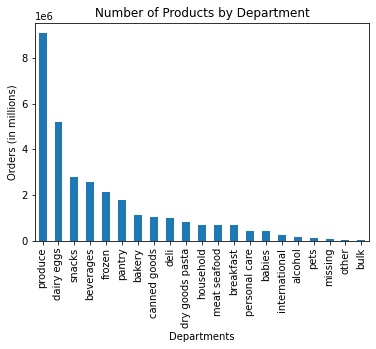

In [200]:
final['department'].value_counts().plot(kind = 'bar', title = 'Number of Products by Department', ylabel = 'Orders (in millions)', xlabel = 'Departments')

In [18]:
dept = final[final['department'] == 'produce']

In [182]:
dept['product_name'].value_counts()

Banana                                453164
Bag of Organic Bananas                366403
Organic Strawberries                  255988
Organic Baby Spinach                  231772
Organic Hass Avocado                  206799
                                       ...  
Baby Beets                                 2
Kumkuats                                   2
Organic Honey Bunch Grape Tomatoes         2
Graffiti Eggplant                          2
Red Banana                                 2
Name: product_name, Length: 1684, dtype: int64

# Question 5 Ordering Behavior

## 5a Brand Loyalty Status

In [100]:
brand = pd.DataFrame(final.groupby(['frequency_flag']).agg({'user_id':['nunique']}))

In [103]:
brand.columns=['count']

In [104]:
brand

,count
frequency_flag,
Frequent customer,75927
Non-frequent customer,36665
Regular customer,50039


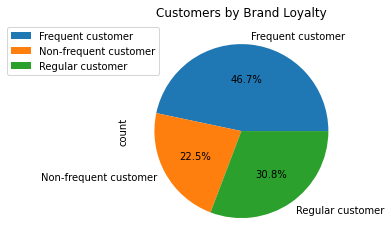

In [116]:
brand.plot(kind = 'pie', y = 'count',autopct='%1.1f%%', title = 'Customers by Brand Loyalty')
plt.legend(bbox_to_anchor=(-.6,1), loc="upper left")

In [85]:
q5a = final.groupby(['frequency_flag']).agg({'prices':['mean'],'total_customer_orders':['mean']})

In [86]:
q5a.columns = ['prices','orders']

In [87]:
q5a = q5a.sort_values('orders')

In [147]:
q5a

,prices,orders
frequency_flag,,
Non-frequent customer,12.004882,5.104182
Regular customer,12.631742,8.878907
Frequent customer,11.697724,22.471446


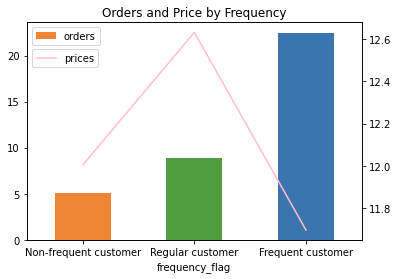

In [151]:
brandColors = ['#EF8636','#519E3E','#3B75AF']
q5a.orders.plot(kind = 'bar', label = 'Orders', title = 'Orders and Price by Frequency', xlabel = "Frequency", color = brandColors)
plt.ylabel = 'Number of Orders'
plt.legend(bbox_to_anchor=(1.,1), loc='upper right', labels = ['orders'])
q5a.prices.plot(kind = 'line', color = 'pink', secondary_y = True, label = 'Prices')
plt.ylabel = 'Average Price'
plt.legend(bbox_to_anchor=(0,.9), loc="upper left", labels = ['prices','orders'])

## 5b Customer Loyalty Status

In [117]:
loyalty = pd.DataFrame(final.groupby(['loyalty_flag']).agg({'user_id':['nunique']}))

In [119]:
loyalty.columns = ['count']

In [120]:
loyalty

,count
loyalty_flag,
Loyal customer,17017
New customer,68750
Regular customer,76864


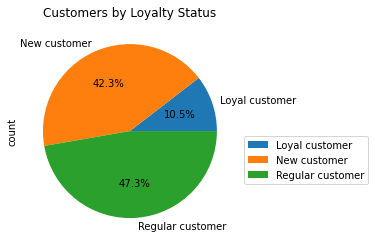

In [125]:
loyalty.plot(kind = 'pie', y = 'count', autopct='%1.1f%%', title = 'Customers by Loyalty Status')
plt.legend(bbox_to_anchor=(1,.5), loc="upper left")

In [41]:
q5b = final.groupby(['loyalty_flag']).agg({'prices':['mean'],'total_customer_orders':['mean']})

In [42]:
q5b.columns = ['prices','orders']

In [43]:
q5b = q5b.sort_values('prices')

In [44]:
q5b

,prices,orders
loyalty_flag,,
Loyal customer,10.386336,32.641196
Regular customer,12.495717,12.347452
New customer,13.387725,4.268295


TypeError: 'str' object is not callable

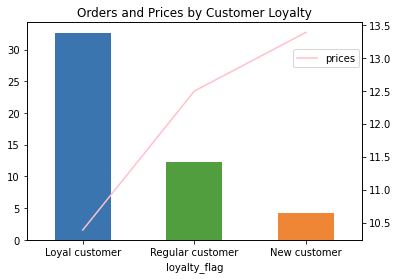

In [45]:
loyaltyColors = ['#3B75AF','#519E3E','#EF8636']
q5b.orders.plot(kind = 'bar', label = 'Orders', title = 'Orders and Prices by Customer Loyalty', color = loyaltyColors)
plt.ylabel = 'Number of Orders'
q5b.prices.plot(kind = 'line', color = 'pink', secondary_y = True, label = 'Prices')
plt.ylabel = 'Average Price'
plt.legend(bbox_to_anchor=(.78,.9), loc="upper left", labels = ['prices','orders'])
plt.title('Orders and Price')

## 5c Region

In [127]:
region = pd.DataFrame(final.groupby(['region']).agg({'user_id':['nunique']}))

In [129]:
region.columns = ['count']

In [130]:
region

,count
region,
Midwest,38376
Northeast,28581
South,54193
West,41481


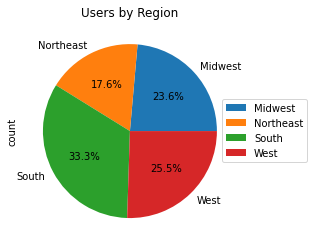

In [161]:
region.plot(kind = 'pie', y = 'count',autopct='%1.1f%%', title = 'Users by Region')
plt.legend(bbox_to_anchor=(.9,.67), loc="upper left")

In [85]:
q5region = final.groupby(['region']).agg({'department':['count']})

In [212]:
q5region

,user_id
,count
region,
Midwest,7261513
Northeast,5464685
South,10311139
West,7927227


In [46]:
q5c = final.groupby(['region']).agg({'prices':['mean'],'total_customer_orders':['mean']})

In [47]:
q5c.columns = ['prices','orders']

In [48]:
q5c = q5c.sort_values('prices')

In [49]:
q5c

,prices,orders
region,,
West,11.276491,17.971929
Northeast,11.542582,17.921760
South,12.118845,17.844674
Midwest,12.681835,17.602828


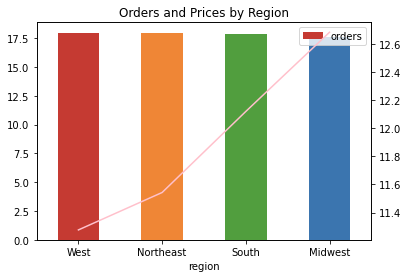

In [56]:
regionColors = ['#C53A32','#EF8636','#519E3E','#3B75AF']
q5c.orders.plot(kind = 'bar', title = 'Orders and Prices by Region', color = regionColors, legend = None)
plt.ylabel = 'Number of Orders'
plt.legend(bbox_to_anchor=(1.35,1), loc='upper right')
q5c.prices.plot(kind = 'line', color = 'pink', secondary_y = True, label = 'Prices')
plt.ylabel = 'Average Price'
plt.title = ''

## 5d Age & Family Status

In [3]:
#creating a sample with a seed of 4 with 70/30
np.random.seed(4)
dev = np.random.rand(len(final)) <= 0.7
small = final[~dev]

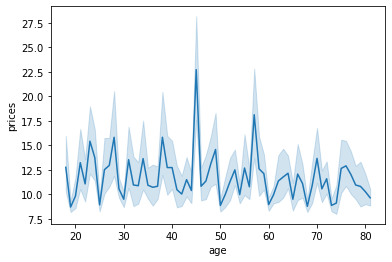

In [4]:
q5d = sns.lineplot(data = small[['age','prices']], x = 'age',y = 'prices')

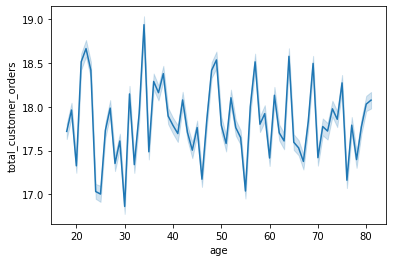

In [5]:
q5dorders = sns.lineplot(data = small[['age','total_customer_orders']], x = 'age', y = 'total_customer_orders')

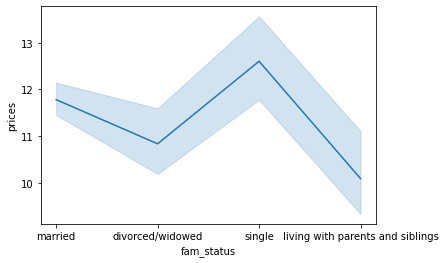

In [6]:
q5dFam = sns.lineplot(data = small[['fam_status','prices']], x = 'fam_status', y = 'prices')

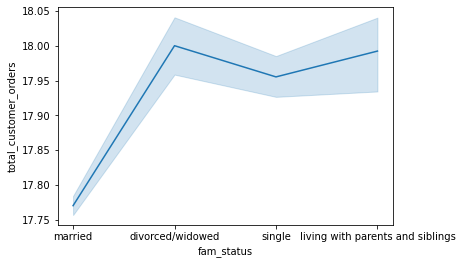

In [4]:
q5dFamOrders = sns.lineplot(data = small[['fam_status','total_customer_orders']], x = 'fam_status', y = 'total_customer_orders')

## 5e Income

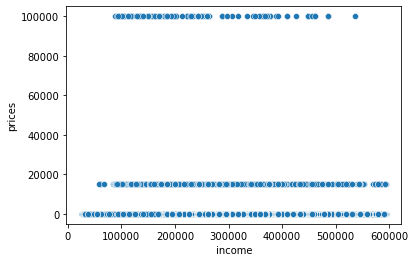

In [6]:
q5e = sns.scatterplot(x = 'income', y = 'prices',data = small)

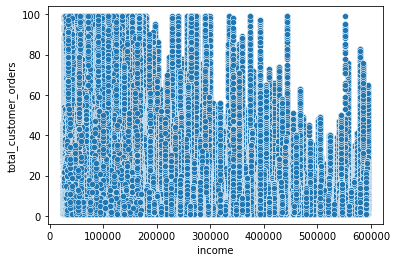

In [7]:
q5e = sns.scatterplot(x = 'income', y = 'total_customer_orders', data = small)

## 5f Customer Profiles

In [8]:
prof = pd.DataFrame(final.groupby(['profile']).agg({'user_id':['nunique']}))

In [9]:
prof.columns = ['count']

In [10]:
prof

,count
profile,
family,114296
single adult,40727
supported parent,7608


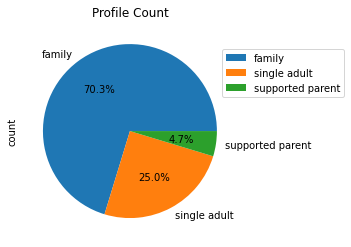

In [18]:
prof.plot(kind = 'pie', y = 'count',autopct='%1.1f%%', title = 'Profile Count')
plt.legend(bbox_to_anchor=(.9,.9), loc="upper left")

In [57]:
q5f = final.groupby(['profile']).agg({'prices':['mean'], 'total_customer_orders':['mean']})

In [58]:
q5f.columns = ['prices','orders']

In [59]:
q5f

,prices,orders
profile,,
family,11.944390,17.778735
single adult,12.102657,17.957922
supported parent,10.890167,18.000712


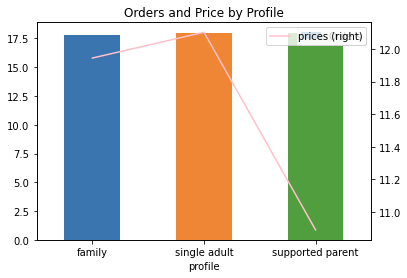

In [60]:
profcolors = ['#3B75AF','#EF8636','#519E3E']
q5f.orders.plot(kind = 'bar', label = 'Orders', title = 'Orders and Price by Profile',color = profcolors)
plt.ylabel = 'Number of Orders'
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
q5f.prices.plot(kind = 'line', color = 'pink', secondary_y = True)
plt.ylabel = 'Average Price'
plt.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.title = 'Prices and Orders by Customer Profile'